I think this code is what the tasks wanted, but I could be wrong. All the mentions of "generate_data" will need to be replaced later with a call to our own function to be written later.

In [ ]:
import numpy as np

total_images = len(image_keys)
train_range = total_images * 4 // 5
np.random.shuffle(image_keys)
train_image_keys = image_keys[:train_range]
valid_image_keys = image_keys[train_range:]

# generate train and validation triples
# REPLACE generate_data WHEN OTHER CODE IS DEVELOPED
triples_train = generate_data(train_image_keys, coco, num_good_captions=30000, tournament_size=1)
triples_valid = generate_data(valid_image_keys, coco, num_good_captions=10000, tournament_size=1)

len(triples_train), len(triples_valid)

In [6]:
from mynn.optimizers import SGD
import mygrad as mg
from mygrad.nnet.losses import margin_ranking_loss
# replace image_searcher later
from image_searcher.model import ImageToWord

num_epochs = 6
batch_size = 32
margin = 0.25
# replace when available
model = ImageToWord(512, 200)
optimizer = SGD(model.parameters, learning_rate=1e-3, momentum=0.9)

ModuleNotFoundError: No module named 'image_searcher'

<IPython.core.display.Javascript object>


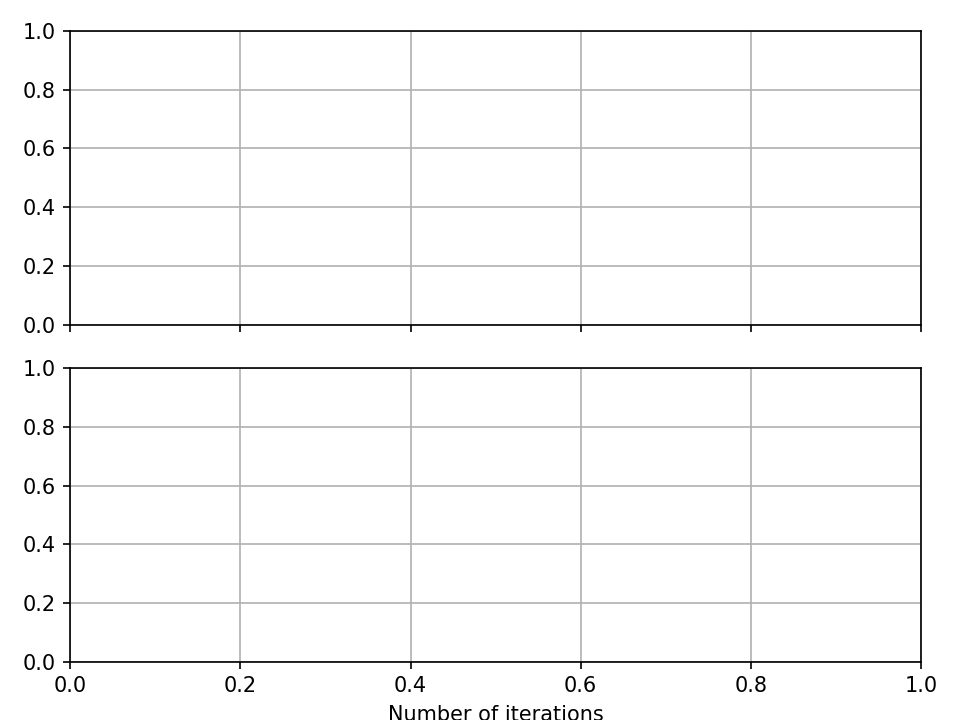

In [7]:
%matplotlib notebook
from noggin import create_plot
plotter, fig, ax = create_plot(["loss", "accuracy"])

In [8]:
model = RNN(dim_input=10, dim_recurrent=50, dim_output=2)
optimizer = Adam(model.parameters)

In [9]:
# replace image_searcher later
from image_searcher.training import get_image_embeddings, process_batch

for epoch in range(num_epochs):
    for i in range(0, len(triples_train), batch_size):
        # replace process_batch
        loss, acc = process_batch(
            triples_train[i : i + batch_size],
            model,
            margin,
            coco=coco,
            resnet18_features=resnet18_features,
        )

        loss.backward()
        optimizer.step()

        plotter.set_train_batch(
            dict(loss=loss.item(), accuracy=acc),
            batch_size=len(triples_valid[i : i + batch_size]),
        )
        mg.turn_memory_guarding_off()  # slightly speeds up training
    
    with mg.no_autodiff:
        for i in range(0, len(triples_valid), batch_size):
            # replace process_batch
            loss, acc = process_batch(
                triples_valid[i : i + batch_size],
                model,
                margin,
                coco=coco,
                resnet18_features=resnet18_features,
            )
            plotter.set_test_batch(
                dict(loss=loss.item(), accuracy=acc),
                batch_size=len(triples_valid[i : i + batch_size]),
            )
    plotter.set_train_epoch()
    plotter.set_test_epoch()
plotter.plot()

ModuleNotFoundError: No module named 'image_searcher'

In [9]:
def generate_data(
    image_ids,
    coco_data,
    num_good_captions,
    triples_per_caption,
    tournament_size):
    
    for i in range(num_good_captions):
        # pick good image
        good_image_id: int = random_choice(image_ids)
            
        # pick good caption
        good_caption_id: int = random_choice(coco_data.image_id_to_caption_ids(good_image_id))
        
        for j in range(triples_per_caption):
            bad_image_id = get_bad_image_id(
            caption_embedding=good_caption_embedding,
                good_image_id=good_image_id,
                coco_data=coco_data,
                image_ids=image_ids,
                tournament_size=tournament_size)
            triples.append((good_caption_id, good_image_id, bad_image_id))
            
    np.random.shuffle(triples)
    
    return [TripletIDS(*t) for t in triples]
                                             
                                             
                                             